In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import os, shutil

In [2]:
from utils.data_loader import fetch_yf_stock_data, add_technical_indicator

In [24]:
ticker = 'AMZ2.L'
interval = '1d'
period = '5y'

In [25]:
df_cur = fetch_yf_stock_data(ticker, interval=interval, period=period, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [26]:
pricefile = f"./data/{ticker}{interval}{period}_yfprice.csv"
if os.path.isfile(pricefile):
    df_last = pd.read_csv(pricefile, index_col=0)
    df_last.index = pd.to_datetime(df_last.index).strftime("%Y-%m-%d %H:%M:%S")
    df_last.reset_index(inplace=True)
    last_day = df_last['Datetime'].iloc[0]
    df_last.to_csv(f"./data/{ticker}T15m_yfprice_{last_day.replace('-', '').replace(' ', '').replace(':', '')}.csv", index=False)
else:
    df_last = pd.DataFrame()
    last_day = df_cur.index[-1]
last_day

'2020-05-29 00:00:00'

In [27]:
'Datetime' not in df_cur.columns

True

In [28]:
df_cur.reset_index(inplace=True)
if 'Datetime' not in df_cur.columns:
    df_cur.rename(columns={'Date': 'Datetime'}, inplace=True)
last_day_idx = df_cur['Datetime'].to_list().index(last_day)
df_cur = df_cur.iloc[:last_day_idx]
if len(df_cur) == 0:
    df_new = df_last
else:
    df_new = pd.concat([df_cur, df_last], ignore_index=False)
df_new.index = df_new['Datetime']
df_final = df_new.drop(['Datetime'], axis=1)
df_final.head()

,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,
2025-05-29 00:00:00,73.050003,73.050003,73.050003,73.050003,73.050003,1
2025-05-28 00:00:00,70.349998,70.349998,70.349998,70.349998,70.349998,0
2025-05-27 00:00:00,70.125000,70.125000,69.900002,69.650002,69.650002,17
2025-05-23 00:00:00,67.275002,67.275002,68.949997,64.400002,68.250000,169
2025-05-22 00:00:00,68.500000,68.500000,69.000000,67.150002,69.000000,17


In [29]:
df_final.to_csv(pricefile)

In [30]:
df_ta = add_technical_indicator(df_final[::-1])
df_ta.tail()

,Adj Close,Close,High,Low,Open,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,...,MACDD_sign_shift,MACDD_sign_signal,WilliamsR,WilliamsR_signal,sma50,sma200,sma_signal,ATR10,ATR20,RSI
Datetime,,,,,,,,,,,,,,,,,,,,,
2025-05-22 00:00:00,68.500000,68.500000,69.000000,67.150002,69.000000,17,64.75750,77.041557,52.473443,0.0,...,1.0,0,-43.406600,0,63.4502,75.297912,-1,3.097243,3.461788,55.297880
2025-05-23 00:00:00,67.275002,67.275002,68.949997,64.400002,68.250000,169,65.23125,77.130262,53.332238,0.0,...,1.0,0,-52.217447,0,63.4097,75.360387,-1,3.242518,3.516198,52.977707
2025-05-27 00:00:00,70.125000,70.125000,69.900002,69.650002,69.650002,17,65.76625,77.534378,53.998122,0.0,...,1.0,0,-35.959893,0,63.3840,75.442725,-1,3.180766,3.471638,57.450699
2025-05-28 00:00:00,70.349998,70.349998,70.349998,70.349998,70.349998,0,66.35875,77.792345,54.925155,0.0,...,1.0,0,-37.577653,0,63.4484,75.516625,-1,2.885189,3.309306,57.792056
2025-05-29 00:00:00,73.050003,73.050003,73.050003,73.050003,73.050003,1,67.06875,78.311036,55.826464,0.0,...,1.0,0,-24.632338,0,63.5138,75.605275,-1,2.866671,3.278841,61.757002


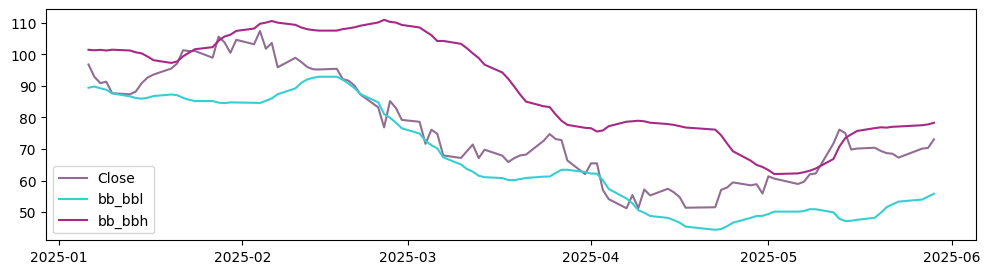

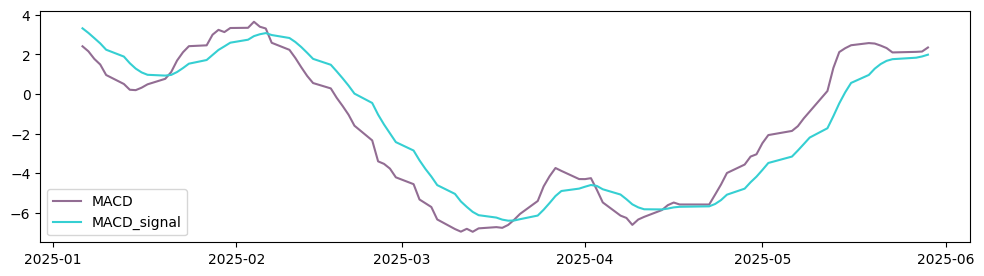

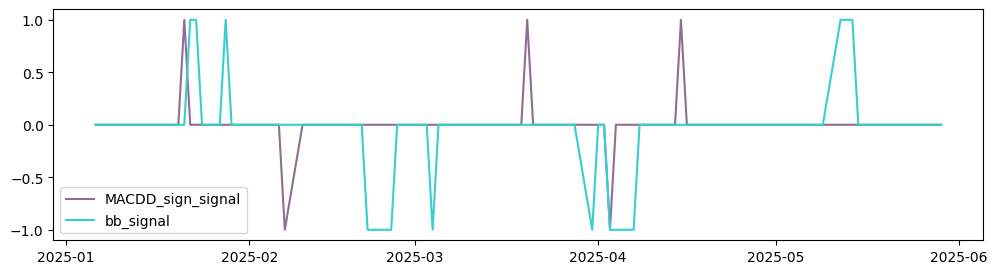

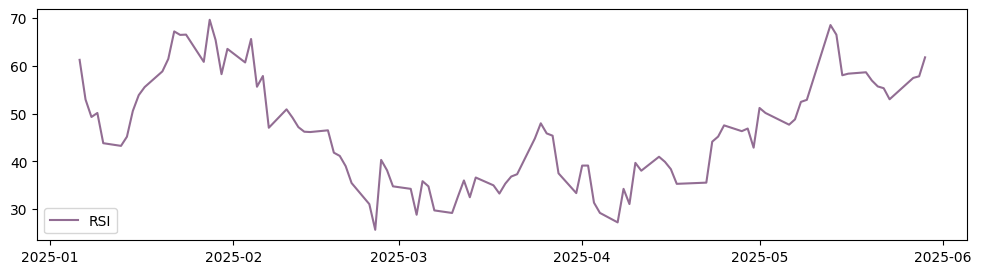

In [31]:
from utils.general import plot_lines

st_idx = -100
plot_lines(df_ta, ['Close','bb_bbl','bb_bbh'], st_idx)
plot_lines(df_ta, ['MACD','MACD_signal'], st_idx)
plot_lines(df_ta, ['MACDD_sign_signal','bb_signal'], st_idx)
plot_lines(df_ta, ['RSI'], st_idx)

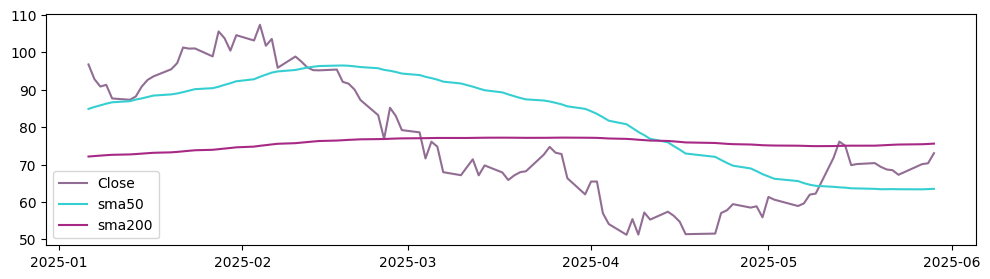

In [32]:
plot_lines(df_ta, ['Close','sma50','sma200'], st_idx)

In [21]:
df_ta['sma200'].tail()

Datetime
2025-05-21 00:00:00    10.969275
2025-05-22 00:00:00    11.009875
2025-05-23 00:00:00    11.049100
2025-05-27 00:00:00    11.095150
2025-05-28 00:00:00    11.138150
Name: sma200, dtype: float64

In [33]:
from utils.data_loader import fetch_investing_news_data, fetch_yfinance_news_data
from datetime import datetime, timedelta

In [34]:
inv_newsfile = f"./data/{ticker}_news_investing.csv"
if os.path.isfile(inv_newsfile):
    df_investing_last = pd.read_csv(newsfile, index_col=0)
    df_investing_last.index = pd.to_datetime(df_investing_last.index).strftime("%Y-%m-%d %H:%M:%S")
    df_investing_last.reset_index(inplace=True)
    last_day = df_investing_last['Datetime'].iloc[0]
    df_investing_last.to_csv(f"./data/{ticker}_news_investing_{last_day.replace('-', '').replace(' ', '').replace(':', '')}.csv")
    last_day = pd.to_datetime(last_day)
    # df_investing = fetch_investing_news_data(ticker, end_datetime=last_day, max_page=1000)
    # df_investing_final = pd.concat([df_investing, df_investing_last], ignore_index=True)
else:
    # last_day = pd.to_datetime(df_final.index[-1])
    last_day = datetime.now() - timedelta(days=30)
    df_investing_final = fetch_investing_news_data(ticker, end_datetime=last_day, max_page=1000)

df_investing_final.to_csv(inv_newsfile)

News collected from 2025-05-21 19:26:16 to 2025-05-07 18:00:26


In [57]:
df_investing_final.head()

,Datetime,headline,source,link
0,2025-05-28 07:47:43,"Nvidia earnings, new Stellantis CEO, Japanese ...",Investing.com,https://www.investing.com/news/economy-news/nv...
1,2025-05-28 07:30:36,European shares flat as investors await US tra...,Reuters,https://www.investing.com/news/stock-market-ne...
2,2025-05-28 07:10:17,Is it time to buy/sell Nvidia ahead of earning...,Investing.com,https://www.investing.com/news/stock-market-ne...
3,2025-05-28 05:42:17,"Gold prices muted as Trump tariff relief, doll...",Investing.com,https://www.investing.com/news/commodities-new...
4,2025-05-28 05:41:00,"Shares dither, US dollar climbs on rosy econom...",Reuters,https://www.investing.com/news/stock-market-ne...


In [20]:
df_yf = fetch_yfinance_news_data(ticker, end_datetime=end_datetime, max_sroll=1000)

News Collecting...l}...
News collected from 2025-05-28 07:32:00 to 2025-05-23 04:35:00


In [ ]:
yf_newsfile = f"./data/{ticker}_news_yfinance.csv"
if os.path.isfile(yf_newsfile):
    df_yfinance_last = pd.read_csv(yf_newsfile, index_col=0)
    df_yfinance_last.index = pd.to_datetime(df_yfinance_last.index).strftime("%Y-%m-%d %H:%M:%S")
    df_yfinance_last.reset_index(inplace=True)
    last_day = df_yfinance_last['Datetime'].iloc[0]
    df_yfinance_last.to_csv(f"./data/{ticker}_news_yfinance_{last_day.replace('-', '').replace(' ', '').replace(':', '')}.csv", index=False)
    last_day = pd.to_datetime(last_day)
    # df_yfinance = fetch_yfinance_news_data(ticker, end_datetime=last_day, max_page=1000)
    # df_yfinance_final = pd.concat([df_yfinance, df_yfinance_last], ignore_index=True)
else:
    last_day = pd.to_datetime(df_final.index[-1])
    # last_day = datetime.now() - timedelta(days=30)
    df_yfinance_final = fetch_yfinance_news_data(ticker, end_datetime=last_day, max_sroll=1000)

df_yfinance_final.to_csv(yf_newsfile)

In [70]:
fetch_yfinance_news_data(ticker, end_datetime=last_day, max_sroll=1000)

News Collecting...l}...
News collected from 2025-05-28 16:00:00 to 2025-05-28 12:32:00


,Datetime,headline,source,description,link
0,2025-05-28 16:00:00,Nvidia earnings: What to watch for on Blackwell,Yahoo Finance Video,Nvidia (NVDA) releases its first quarter resul...,https://finance.yahoo.com/video/nvidia-earning...
1,2025-05-28 06:25:00,Nvidia earnings live: Nvidia set to report cru...,Yahoo Finance,Nvidia's first quarter earnings report is sche...,https://finance.yahoo.com/news/live/nvidia-ear...
2,2025-05-28 04:05:00,"Stock market today: Dow, S&P 500, Nasdaq soar ...",Yahoo Finance,Optimism for a US-EU trade deal is growing as ...,https://finance.yahoo.com/news/live/stock-mark...
3,2025-05-28 03:00:00,Nvidia stock: What export controls mean for th...,Yahoo Finance Video,Nvidia (NVDA) reports its first quarter result...,https://finance.yahoo.com/video/nvidia-stock-e...
4,2025-05-27 19:26:00,Why this Nvidia bull is 'anxious' ahead of ear...,Yahoo Finance Video,Chipmakers are in focus ahead of Nvidia's (NVD...,https://finance.yahoo.com/video/why-nvidia-bul...
5,2025-05-27 19:05:00,Nvidia's bear case: Is the hype train running ...,Yahoo Finance,There is a bear case to every bull case on a s...,https://finance.yahoo.com/news/nvidias-bear-ca...
6,2025-05-28 16:35:00,Nvidia's Big Moment Is Just Ahead. Here's What...,Motley Fool,Nvidia stock drove market gains over the past ...,https://finance.yahoo.com/news/nvidias-big-mom...
7,2025-05-28 16:30:00,1 Dark Horse Candidate for Best-Performing AI ...,Motley Fool,Nvidia has been a huge winner in the AI arms r...,https://finance.yahoo.com/news/1-dark-horse-ca...
8,2025-05-28 16:29:00,Global Markets Mixed; Investors Eye Nvidia Ear...,The Wall Street Journal,U.S. stock futures pointed to a slightly weake...,https://finance.yahoo.com/m/4c5cc58a-c7f2-3d2a...
9,2025-05-28 16:22:00,What’s Fueling Wall Street’s 90-Day Optimism o...,Insider Monkey,We recently published a list of 10 AI Stocks o...,https://finance.yahoo.com/news/fueling-wall-st...
